In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import warnings

warnings.filterwarnings("ignore")

### Load data

In [3]:
data = pd.read_csv(r"../data/titanic.csv")
data

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [4]:
data.drop(columns=['Name'], inplace=True)
data['Sex'] = data['Sex'].replace({'male': 0, 'female': 1})
data

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,0,27.0,0,0,13.0000
883,1,1,1,19.0,0,0,30.0000
884,0,3,1,7.0,1,2,23.4500
885,1,1,0,26.0,0,0,30.0000


In [5]:
data.shape

(887, 7)

In [6]:
X=data.iloc[:,1:7].values
y=data.iloc[:,0].values

In [7]:
from StratKFold import StratKFold
sk = StratKFold(n_splits=10)
sk.add_data(X,y)
folds = sk.get_folds()

[([585, 839, 358, 608, 169, 151, 821, 785, 560, 361, 783, 170, 202, 599, 649, 199, 95, 681, 490, 592, 528, 856, 808, 607, 261, 634, 818, 679, 421, 756, 71, 322, 508, 136, 402, 813, 872, 526, 815, 190, 725, 118, 27, 512, 460, 600, 583, 554, 409, 33, 0, 463, 485, 497, 153, 615, 379, 299, 481, 298, 530, 689, 10, 640, 301, 793, 65, 588, 527, 423, 97, 354, 520, 567, 676, 697, 191, 534, 15, 208, 46, 476, 646, 141, 457, 723, 415, 597, 747, 687, 763, 88, 137, 496, 90, 524, 859, 196, 538, 575, 386, 708, 752, 37, 280, 382, 474, 238, 518, 18, 394, 438, 492, 250, 133, 16, 850, 274, 393, 589, 580, 76, 764, 252, 100, 448, 109, 766, 154, 245, 420, 369, 226, 654, 359, 881, 30, 621, 860, 264, 163, 787, 857, 672, 754, 823, 203, 145, 325, 165, 543, 256, 444, 556, 343, 186, 845, 445, 705, 215, 443, 17, 648, 775, 106, 817, 258, 296, 323, 150, 39, 805, 410, 629, 450, 573, 87, 332, 320, 673, 6, 822, 545, 68, 742, 390, 176, 138, 48, 120, 376, 383, 472, 571, 664, 671, 730, 89, 430, 699, 291, 285, 690, 47, 802,

In [8]:
X_col_type = np.ones(X[0].shape)
X_col_type[0] = 0
X_col_type[1] = 0
X_col_type

array([0., 0., 1., 1., 1., 1.])

### Random Forest

In [9]:
from RandomForestClassifier import RandomForestClassifier 
# rfc = RandomForestClassifier(5)

In [10]:
from multiple_utils import compute_confusion_matrix, calculate_accuracy, calculate_precision, calculate_recall, calculate_f1score
accuracies = []
f1_scores = []
n_tree_values = [1,5,10,20,30,40,50]
for ntrees in n_tree_values:
    rfc = RandomForestClassifier(criterion="gini_impurity",ntree=ntrees, maximal_depth=15)
    mean_accuracy = 0
    mean_f1_score = 0

    for fold in folds:
        train_indices = fold[0]
        test_indices = fold[1]
        X_train = X[train_indices]
        y_train = y[train_indices]
        X_test = X[test_indices]
        y_test = y[test_indices]
        rfc.fit(X_train, y_train, X_col_type)
        y_pred = rfc.predict(X_test)
        confusion_mat, n = compute_confusion_matrix(y_test, y_pred,[0,1])
        mean_accuracy += calculate_accuracy(confusion_mat, n) 
        mean_f1_score += calculate_f1score(calculate_precision(confusion_mat), calculate_recall(confusion_mat))


    mean_accuracy /= len(folds)
    mean_f1_score /= len(folds)
    print("accuracy: ", mean_accuracy)
    print("f1 score: ", mean_f1_score)
    accuracies.append(mean_accuracy)
    f1_scores.append(mean_f1_score)


accuracy:  0.7123975712177959
f1 score:  0.6934776021131739
accuracy:  0.724934456928839
f1 score:  0.6983420645885544
accuracy:  0.7463471796617863
f1 score:  0.7273923636006938
accuracy:  0.7452610373396891
f1 score:  0.7255250642198788
accuracy:  0.7722054817841336
f1 score:  0.7561717480701867
accuracy:  0.7520797866303484
f1 score:  0.7339659162495592
accuracy:  0.7633932016797186
f1 score:  0.7467106186203607


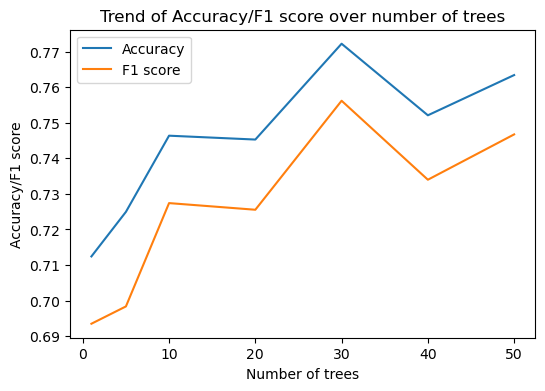

In [11]:
plt.figure(figsize=(6, 4))
plt.plot(n_tree_values, accuracies, label="Accuracy")
plt.plot(n_tree_values, f1_scores, label="F1 score")
plt.xlabel('Number of trees')
plt.ylabel('Accuracy/F1 score')
plt.title('Trend of Accuracy/F1 score over number of trees')
plt.legend()
plt.show()

In [12]:
max_index = accuracies.index(max(accuracies))
print("Optimal accuracy reached at number of trees: ", n_tree_values[max_index])
max_index = f1_scores.index(max(f1_scores))
print("Optimal F1 score reached at number of trees: ", n_tree_values[max_index])

Optimal accuracy reached at number of trees:  30
Optimal F1 score reached at number of trees:  30


In [13]:
from multiple_utils import compute_confusion_matrix, calculate_accuracy, calculate_precision, calculate_recall, calculate_f1score
accuracies = []
f1_scores = []
max_depths = [10,20,30,40,50]
for max_depth in max_depths:
    rfc = RandomForestClassifier(criterion="gini_impurity",ntree=50, maximal_depth=max_depth)
    mean_accuracy = 0
    mean_f1_score = 0

    for fold in folds:
        train_indices = fold[0]
        test_indices = fold[1]
        X_train = X[train_indices]
        y_train = y[train_indices]
        X_test = X[test_indices]
        y_test = y[test_indices]
        rfc.fit(X_train, y_train, X_col_type)
        y_pred = rfc.predict(X_test)
        confusion_mat, n = compute_confusion_matrix(y_test, y_pred,[0,1])
        mean_accuracy += calculate_accuracy(confusion_mat, n) 
        mean_f1_score += calculate_f1score(calculate_precision(confusion_mat), calculate_recall(confusion_mat))


    mean_accuracy /= len(folds)
    mean_f1_score /= len(folds)
    print("accuracy: ", mean_accuracy)
    print("f1 score: ", mean_f1_score)
    accuracies.append(mean_accuracy)
    f1_scores.append(mean_f1_score)


accuracy:  0.7621169560776303
f1 score:  0.7449621437323005
accuracy:  0.7756769946657587
f1 score:  0.7604058497575009
accuracy:  0.7701089547156963
f1 score:  0.7542753359361829
accuracy:  0.776852230166837
f1 score:  0.7620318925492604
accuracy:  0.7633543298150038
f1 score:  0.7458755924446202


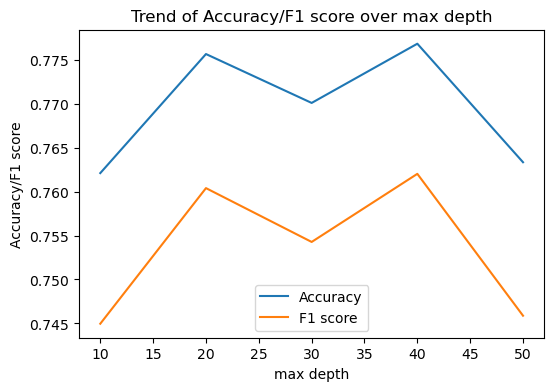

In [14]:
plt.figure(figsize=(6, 4))
plt.plot(max_depths, accuracies, label="Accuracy")
plt.plot(max_depths, f1_scores, label="F1 score")
plt.xlabel('max depth')
plt.ylabel('Accuracy/F1 score')
plt.title('Trend of Accuracy/F1 score over max depth')
plt.legend()
plt.show()

### KNN

In [15]:
from KNNClassifier import KNN_Classifier

In [16]:
from multiple_utils import compute_confusion_matrix, calculate_accuracy, calculate_precision, calculate_recall, calculate_f1score
from utils import Normalizer
scaler = Normalizer()

accuracies = []
f1_scores = []
n_neighbors = [1,5,10,20,30,40,50]
#n_neighbors = [1]
for n_neighbor in n_neighbors:
    knn = KNN_Classifier(n_neighbors=n_neighbor) 
    mean_accuracy = 0
    mean_f1_score = 0

    for fold in folds:
        train_indices = fold[0]
        test_indices = fold[1]
        X_train = X[train_indices]
        y_train = y[train_indices]
        X_train = scaler.fit_transform(X_train)
        X_test = X[test_indices]
        y_test = y[test_indices]
        X_test = scaler.transform(X_test)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        confusion_mat, n = compute_confusion_matrix(y_test, y_pred,[0,1])
        mean_accuracy += calculate_accuracy(confusion_mat, n) 
        mean_f1_score += calculate_f1score(calculate_precision(confusion_mat), calculate_recall(confusion_mat))

    mean_accuracy /= len(folds)
    mean_f1_score /= len(folds)
    print("accuracy: ", mean_accuracy)
    print("f1 score: ", mean_f1_score)
    accuracies.append(mean_accuracy)
    f1_scores.append(mean_f1_score)


accuracy:  0.7475607195551015
f1 score:  0.7373601453543734
accuracy:  0.8073059244126661
f1 score:  0.7992188757404154
accuracy:  0.7972559868346385
f1 score:  0.7882706242422752
accuracy:  0.8073056406764272
f1 score:  0.7961189526766488
accuracy:  0.8129746907274997
f1 score:  0.8019167244719748
accuracy:  0.8072806718874135
f1 score:  0.7951797443942163
accuracy:  0.800526046986721
f1 score:  0.7874985584981528


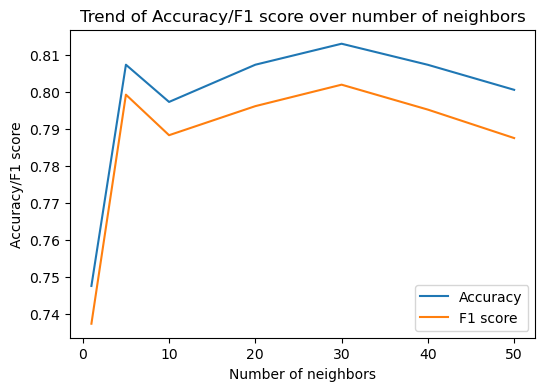

In [17]:
plt.figure(figsize=(6, 4))
plt.plot(n_neighbors, accuracies, label="Accuracy")
plt.plot(n_neighbors, f1_scores, label="F1 score")
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy/F1 score')
plt.title('Trend of Accuracy/F1 score over number of neighbors')
plt.legend()
plt.show()

In [18]:
max_index = accuracies.index(max(accuracies))
print("Optimal accuracy reached at number of neighbors: ", n_neighbors[max_index])
max_index = f1_scores.index(max(f1_scores))
print("Optimal F1 score reached at number of neighbors: ", n_neighbors[max_index])

Optimal accuracy reached at number of neighbors:  30
Optimal F1 score reached at number of neighbors:  30
